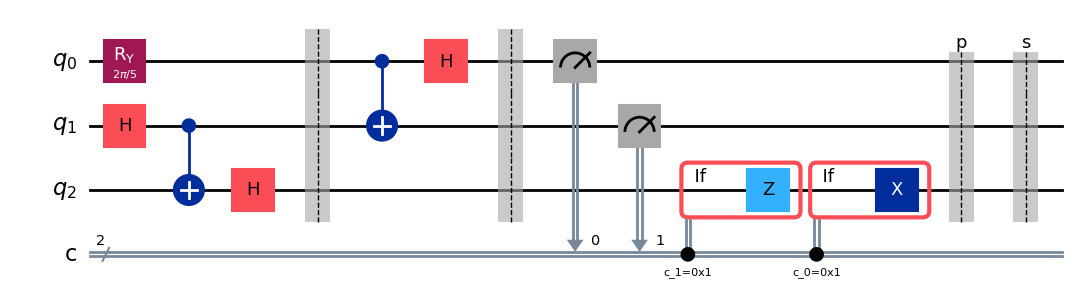

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import partial_trace
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.circuit.classical import expr
import numpy as np

# q0: data qubit (input state)
# q1: ancilla (entangled) qubit
# q2: target of teleportation
qc = QuantumCircuit(3, 2)

#Prepares the starting qubit in arbitrary state to make sure the gate teleportation works
qc.ry(2 * np.pi / 5, 0)

#entangle the other qubits
qc.h(1)
qc.cx(1, 2)
qc.h(2)  #this can be any unitary gate 
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Measure q0 and q1: the goal is that when the state is teleported it is teleported "through H gate", so tagert qubit will hold H|state>
qc.measure(0, 0)
qc.measure(1, 1)

# Apply corrections based on measurements of the first two qubits in the Bell Basis
with qc.if_test((qc.clbits[1], 1)):
    qc.z(2)
with qc.if_test((qc.clbits[0], 1)):
    qc.x(2)

#Keeps the state of the system after teleportation
qc.save_density_matrix(label='p')
qc.save_statevector(label='s')
qc.draw('mpl')


In [2]:
#Runs simulation
simulator = AerSimulator()
qct = transpile(qc, backend=simulator)
result = simulator.run(qct, shots=1000, memory=True).result()

#Retrieves the final density matrix and traces over the ancillary qubits to isolate the target qubit
density_matrix = result.data()['p']
reduced_matrix = partial_trace(density_matrix, [0, 1])
reduced_matrix.draw(output='latex')
#state_vec = result.data()['s']
#state_vec.draw(output='latex')

<IPython.core.display.Latex object>

In [3]:
#Creates a reference density matrix for the circuit without teleportation to check correctness
qc_ref = QuantumCircuit(1)
qc_ref.ry(2 * np.pi / 5, 0) #Use same state preparation
qc_ref.h(0) #Use the same gate that was teleported earlier
qc_ref.save_density_matrix(label='p')
qc_ref.save_statevector(label='s')
simulator = AerSimulator()
qc_reft = transpile(qc_ref, backend=simulator)
result = simulator.run(qc_reft, shots=1000, memory=True).result()
density_matrix = result.data()['p']
density_matrix.draw(output='latex')
#state_vec = result.data()['s']
#state_vec.draw(output='latex')

<IPython.core.display.Latex object>

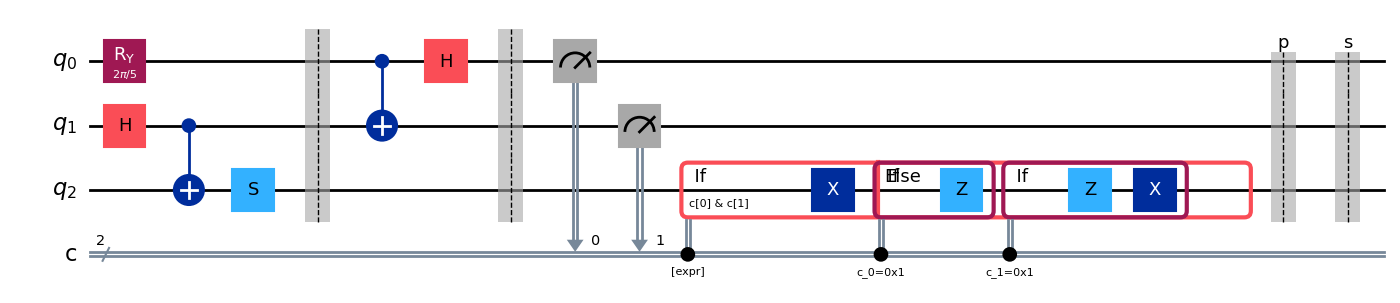

In [4]:
# q0: data qubit (input state)
# q1: ancilla (entangled) qubit
# q2: target of teleportation
qc = QuantumCircuit(3, 2)

#Prepares the starting qubit in arbitrary state to make sure the gate teleportation works
qc.ry(2 * np.pi / 5, 0)

#entangle the other qubits
qc.h(1)
qc.cx(1, 2)
qc.s(2)  #this can be any unitary gate 
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Measure q0 and q1: the goal is that when the state is teleported it is teleported "through H gate", so tagert qubit will hold H|state>
qc.measure(0, 0)
qc.measure(1, 1)

with qc.if_test(expr.bit_and(qc.clbits[0], qc.clbits[1])) as else_:
    qc.x(2)
with else_:
    with qc.if_test((qc.clbits[0], 1)):
        qc.z(2)
    with qc.if_test((qc.clbits[1], 1)):
        qc.z(2)
        qc.x(2)

#Keeps the state of the system after teleportation
qc.save_density_matrix(label='p')
qc.save_statevector(label='s')
qc.draw('mpl')


In [5]:
#Runs simulation
simulator = AerSimulator()
qct = transpile(qc, backend=simulator)
result = simulator.run(qct, shots=1000, memory=True).result()

#Retrieves the final density matrix and traces over the ancillary qubits to isolate the target qubit
density_matrix = result.data()['p']
reduced_matrix = partial_trace(density_matrix, [0, 1])
reduced_matrix.draw(output='latex')
#state_vec = result.data()['s']
#state_vec.draw(output='latex')

<IPython.core.display.Latex object>

In [6]:
#Creates a reference density matrix for the circuit without teleportation to check correctness
qc_ref = QuantumCircuit(1)
qc_ref.ry(2 * np.pi / 5, 0) #Use same state preparation
qc_ref.s(0) #Use the same gate that was teleported earlier
qc_ref.save_density_matrix(label='p')
qc_ref.save_statevector(label='s')
simulator = AerSimulator()
qc_reft = transpile(qc_ref, backend=simulator)
result = simulator.run(qc_reft, shots=1000, memory=True).result()
density_matrix = result.data()['p']
density_matrix.draw(output='latex')
#state_vec = result.data()['s']
#state_vec.draw(output='latex')

<IPython.core.display.Latex object>